# Distribucion de Poisson

$$ P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

Donde:
- $P(X=k)$ es la probabilidad de que ocurran $k$ eventos en un intervalo de tiempo.
- $\lambda$ es el número promedio de eventos que ocurren en un intervalo de tiempo.
- $k$ es el número de eventos que queremos encontrar la probabilidad.

Usano la libreria `from scipy.stats import poisson`:
- `poisson.pmf(k=x, mu=lambda)` nos da la probabilidad de que ocurran $k$ eventos en un intervalo de tiempo $P(X=k)$ 
- `poisson.cdf(k=x, mu=lambda)` nos da la probabilidad de que ocurran $k$ o menos eventos en un intervalo de tiempo $P(X \leq k)$
- `poisson.sf(k=x, mu=lambda)` nos da la probabilidad de que ocurran más de $k$ eventos en un intervalo de tiempo $P(X > k)$
- `poisson.isf(q=x, mu=lambda)` nos da el valor de $k$ tal que $P(X > k) = x$
- `poisson.ppf(q=x, mu=lambda)` nos da el valor de $k$ tal que $P(X \leq k) = x$
- `poisson.stats(mu=lambda, moments='mvsk')` nos da la media, varianza, sesgo y curtosis de la distribución de Poisson
- `poisson.rvs(mu=lambda, size=n)` nos da una muestra aleatoria de tamaño $n$ de la distribución de Poisson

Esperanza:
($\mu = E(X)$): $$ E(X) = \sum_{k=0}^{\infty} k \cdot P(X=k) $$

Varianza:
($\sigma^2 = Var(X)$): $$ Var(X) = \sum_{k=0}^{\infty} (k - \mu)^2 \cdot P(X=k) $$

Recordar que $P(X=k) = x_i = p_i$, es decir, cada valor de las muestras simuladas.

In [13]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt

from scipy.special import factorial

# Ejemplos

## Ejemplo 1

A la oficina de reservaciones de una aerolinea regional llegan 5 llamadas por hora.
1. ¿Cuál es la probabilidad de decibir exactamente 5 llamadas en un lapso 5 minuto?

Si $ X = \text{cantidad de reservaciones por minuto} $, entonces $ \lambda = 48/60 = 0.8 $.

In [14]:
mu = 5

In [15]:
# Primera forma de generar muestras aleatorias de una distribución de Poisson
np.random.seed(47)

muestras_np = np.random.poisson(mu, 1000)

In [16]:
# Segunda forma de generar muestras aleatorias de una distribución de Poisson
np.random.seed(47)

poisson_dist = poisson(mu)
muestras_stats = poisson_dist.rvs(1000)

In [17]:
# Funcion de distribución acumulada F(x) = P(X <= x)
y = poisson_dist.cdf(muestras_stats)

Usamos la formula matemática:

In [22]:
# mustras de la variable aleatoria X=x_i
x = np.arange(0, mu*2+2)
# y = np.exp(-mu) * mu**x / factorial(x)  # Falla por la precisión de los números flotantes
y = poisson.pmf(x, mu) # y = p_i

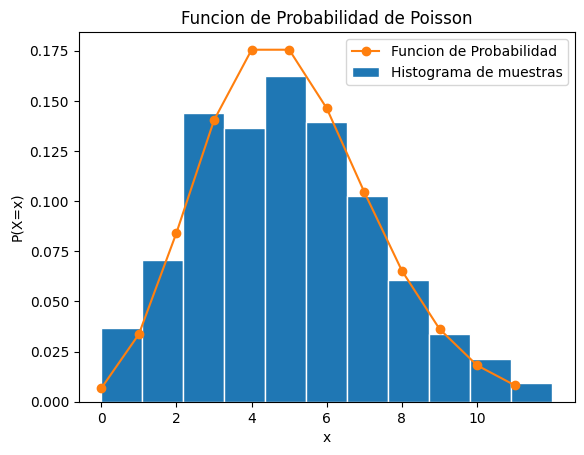

In [19]:
# Graficamos la distribución de las muestras
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.hist(muestras_stats, bins=11, edgecolor='white', density=True)
ax.plot(x, y, '-o')

ax.set_xlabel('x')
ax.set_ylabel('P(X=x)')
ax.set_title('Funcion de Probabilidad de Poisson')

ax.legend(['Funcion de Probabilidad', 'Histograma de muestras'])

ax.set_xticks(np.arange(0, mu*2+2, 2))
#ax.yticks(np.arange(0, 16, 1))

plt.show()


La esperanza de la distribución de Poisson es $ \lambda$ = $\mu$.

In [20]:
print('Media de las muestras: ', np.mean(muestras_stats), '\nMedia teórica(Esperanza): ', mu)

Media de las muestras:  5.037 
Media teórica(Esperanza):  5


La varianza es:

In [21]:
print('Varianza de las muestras: ', np.var(muestras_stats), '\nVarianza teórica: ', mu)

Varianza de las muestras:  4.949630999999999 
Varianza teórica:  5
